In [4]:
# Exploratory Data Analysis (EDA)
# This notebook explores the dataset to uncover patterns, handle missing values, and analyze class imbalance.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
data = pd.read_csv('data/train.csv')

# Display the first few rows
data.head()

# Summary Statistics
data.describe()

# Missing Values Analysis
missing_values = data.isnull().sum()
missing_values[missing_values > 0]

# Class Distribution
sns.countplot(x='Genetic_Disorder', data=data)
plt.title('Class Distribution')
plt.show()

# Feature Distributions
numeric_features = data.select_dtypes(include=[np.number]).columns
data[numeric_features].hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

# Correlation Matrix
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


ValueError: Could not interpret value `Genetic_Disorder` for `x`. An entry with this name does not appear in `data`.

Class distribution before SMOTE:
Genetic_Disorder
Mitochondrial genetic inheritance disorders     10202
Single-gene inheritance diseases                 7664
Multifactorial genetic inheritance disorders     2071
Name: count, dtype: int64


C:\Users\Sarat\AppData\Local\Temp\ipykernel_22332\2174670671.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Genetic_Disorder', data=train_data, palette='pastel')


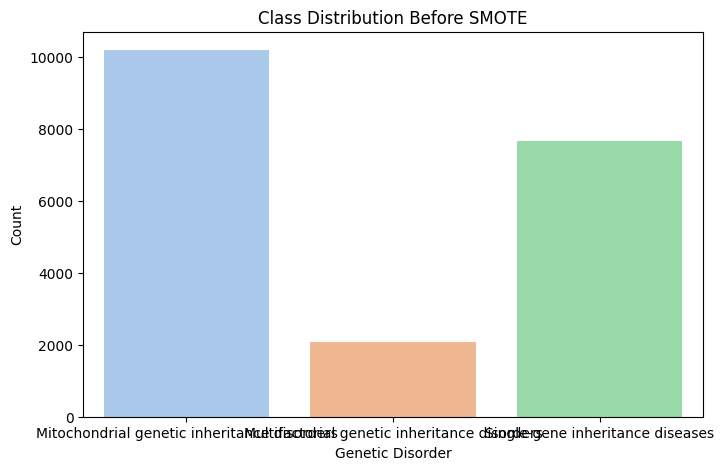

Class distribution after initial SMOTE:
Counter({0: 10202, 1: 10202, 2: 10202})


C:\Users\Sarat\AppData\Local\Temp\ipykernel_22332\2174670671.py:100: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(resampled_classes.keys()), y=list(resampled_classes.values()), palette='pastel')


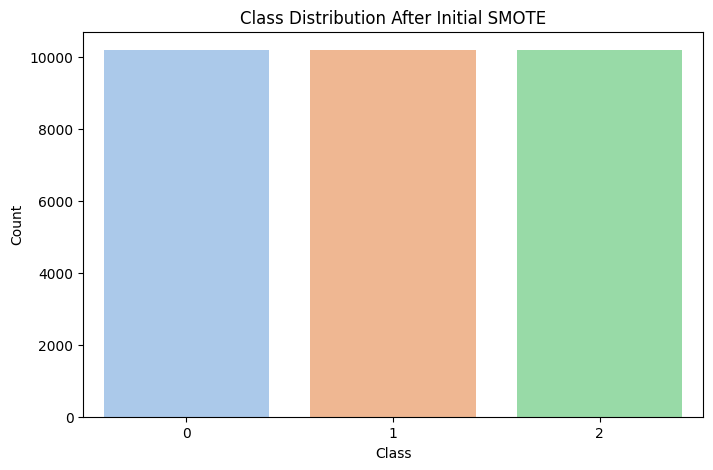

ValueError: With over-sampling methods, the number of samples in a class should be greater or equal to the original number of samples. Originally, there is 10202 samples and 8000 samples are asked.

In [ ]:
# %% Import necessary libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# %% Load and clean the dataset
train_data = pd.read_csv('data/train.csv')

# Remove quotes and replace spaces with underscores
train_data.columns = [col.strip().replace("'", '').replace(' ', '_') for col in train_data.columns]

# Rename columns for consistency
train_data = train_data.rename(columns={
    'Genes_in_mothers_side': 'Genes_Mothers_Side',
    'Inherited_from_father': 'Inherited_Father',
    'Blood_cell_count_(mcL)': 'Blood_Cell_mcL',
    'Respiratory_Rate_(breaths/min)': 'Respiratory_Rate_breaths_min',
    'Heart_Rate_(rates/min': 'Heart_Rates_Min',
    'Follow-up': 'Follow_up',
    'Autopsy_shows_birth_defect_(if_applicable)': 'Autopsy_Birth_Defect',
    'Folic_acid_details_(peri-conceptional)': 'Folic_Acid',
    'H/O_serious_maternal_illness': 'Maternal_Illness',
    'H/O_radiation_exposure_(x-ray)': 'Radiation_Exposure',
    'H/O_substance_abuse': 'Substance_Abuse',
    'Assisted_conception_IVF/ART': 'Assisted_Conception',
    'History_of_anomalies_in_previous_pregnancies': 'History_Previous_Pregnancies',
    'No._of_previous_abortion': 'Previous_Abortion',
    'Birth_defects': 'Birth_Defects',
    'White_Blood_cell_count_(thousand_per_microliter)': 'White_Blood_Cell',
})

# Drop rows where 'Genetic_Disorder' is NaN
train_data.dropna(subset=['Genetic_Disorder'], inplace=True)
train_data.reset_index(drop=True, inplace=True)

# %% Class distribution before SMOTE
print("Class distribution before SMOTE:")
print(train_data['Genetic_Disorder'].value_counts())

# Visualize class distribution before SMOTE
plt.figure(figsize=(8, 5))
sns.countplot(x='Genetic_Disorder', data=train_data, palette='pastel')
plt.title('Class Distribution Before SMOTE')
plt.xlabel('Genetic Disorder')
plt.ylabel('Count')
plt.show()

# %% Prepare features and target for SMOTE
X = train_data.drop(columns=["Genetic_Disorder", "Disorder_Subclass"])
y = train_data["Genetic_Disorder"]

# Encode categorical variables for SMOTE
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Preprocess numerical features
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

numeric_features = X.select_dtypes(include=['float64', 'int64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Define pipelines for preprocessing
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Apply preprocessing
X_preprocessed = preprocessor.fit_transform(X)

# %% Apply first-stage SMOTE
from imblearn.over_sampling import SMOTE

print("Class distribution after initial SMOTE:")
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_preprocessed, y_encoded)

resampled_classes = Counter(y_resampled)
print(resampled_classes)

# Visualize class distribution after initial SMOTE
plt.figure(figsize=(8, 5))
sns.barplot(x=list(resampled_classes.keys()), y=list(resampled_classes.values()), palette='pastel')
plt.title('Class Distribution After Initial SMOTE')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# Adjusted targeted SMOTE
targeted_smote = SMOTE(sampling_strategy={0: 10202, 1: 10202, 2: 10202}, random_state=42)

# Apply SMOTE
X_targeted, y_targeted = targeted_smote.fit_resample(X_resampled, y_resampled)

# Check the class distribution after targeted SMOTE
final_resampled_classes = Counter(y_targeted)
print("Class distribution after targeted SMOTE:", final_resampled_classes)

# Visualize class distribution after targeted SMOTE
plt.figure(figsize=(8, 5))
sns.barplot(x=list(final_resampled_classes.keys()), y=list(final_resampled_classes.values()), palette='pastel')
plt.title('Class Distribution After Targeted SMOTE')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# %% Highlight important features after regularization
from sklearn.linear_model import Lasso

# Fit Lasso regression for feature selection
lasso = Lasso(alpha=0.01)  # Adjust alpha as needed
lasso.fit(X_targeted, y_targeted)

# Extract important features
feature_names = preprocessor.get_feature_names_out()
lasso_coefficients = lasso.coef_

important_features = [
    (feature, coef) for feature, coef in zip(feature_names, lasso_coefficients) if coef != 0
]

# Sort features by importance
important_features = sorted(important_features, key=lambda x: abs(x[1]), reverse=True)

# Display top features
print("Top important features after Lasso regularization:")
for feature, coef in important_features[:10]:
    print(f"{feature}: {coef:.4f}")

# Visualize top important features
feature_labels, feature_importance = zip(*important_features[:10])
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=feature_labels, palette='viridis')
plt.title('Top Features Selected by Lasso')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()
